## UEFA Champions League 2022/23

#### R16 Draw Prediction

In [1]:
# imports

import numpy as np
import pandas as pd

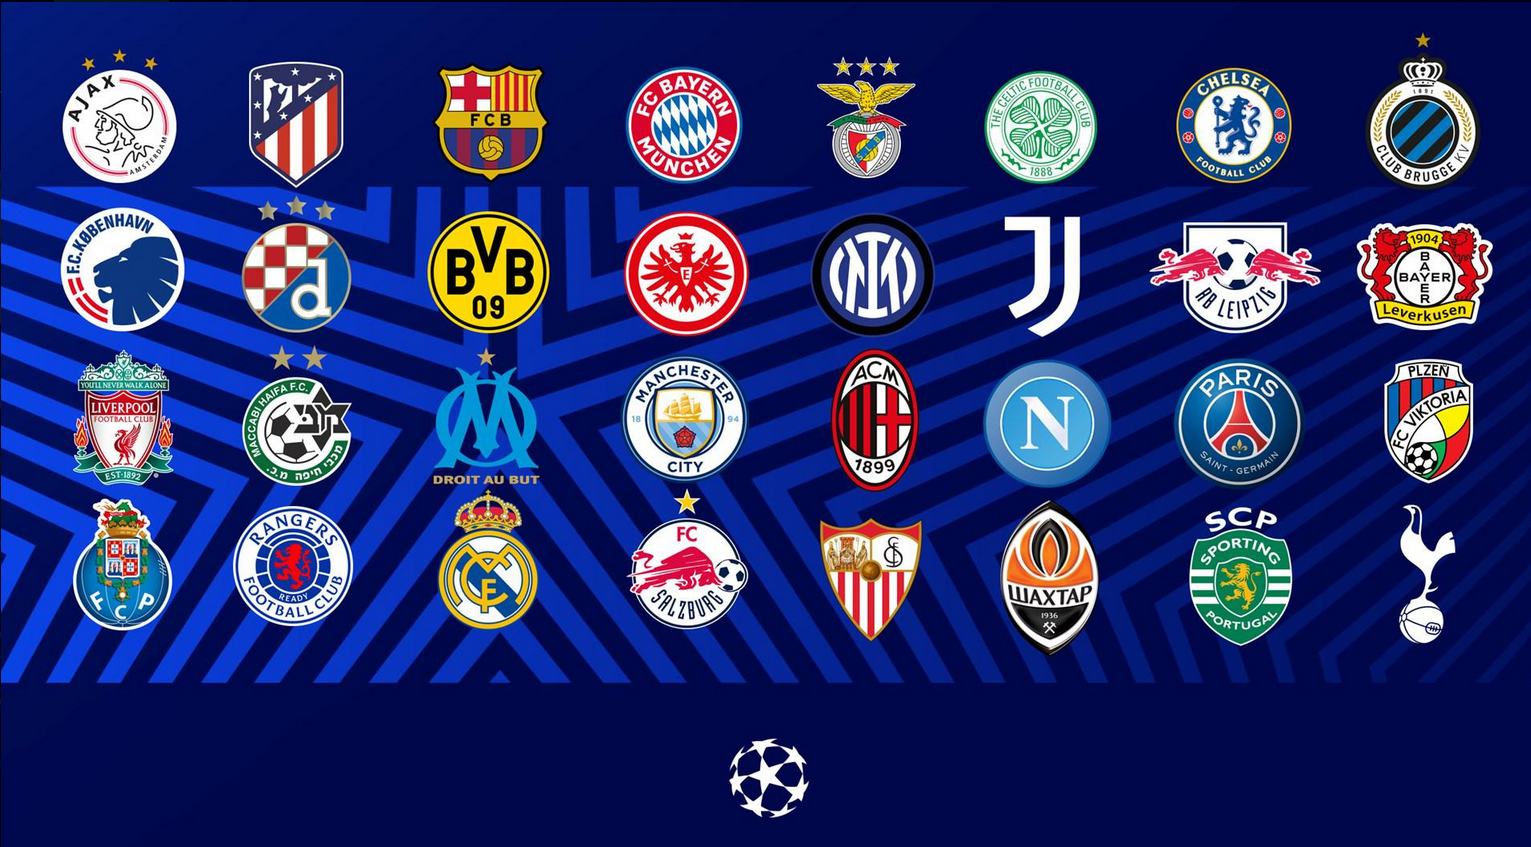

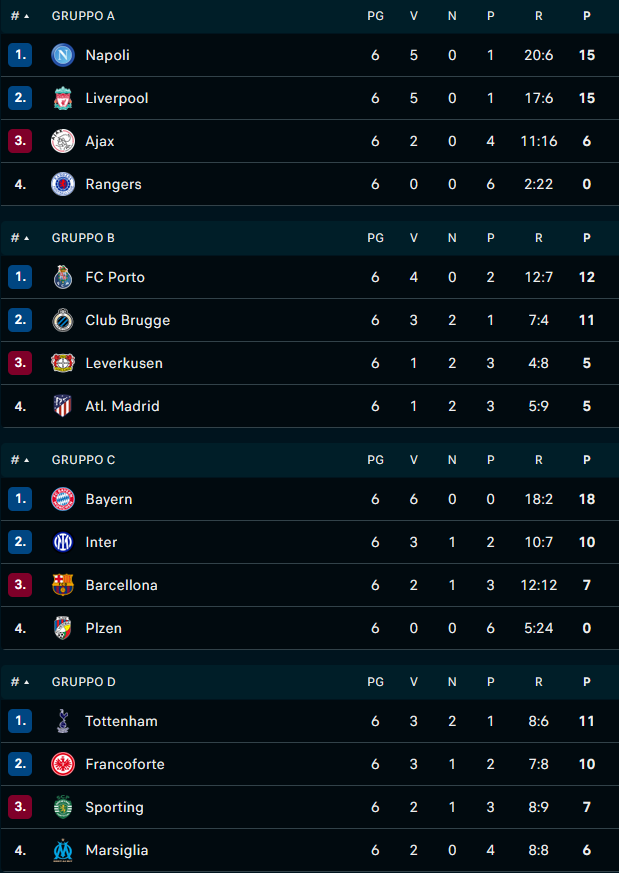

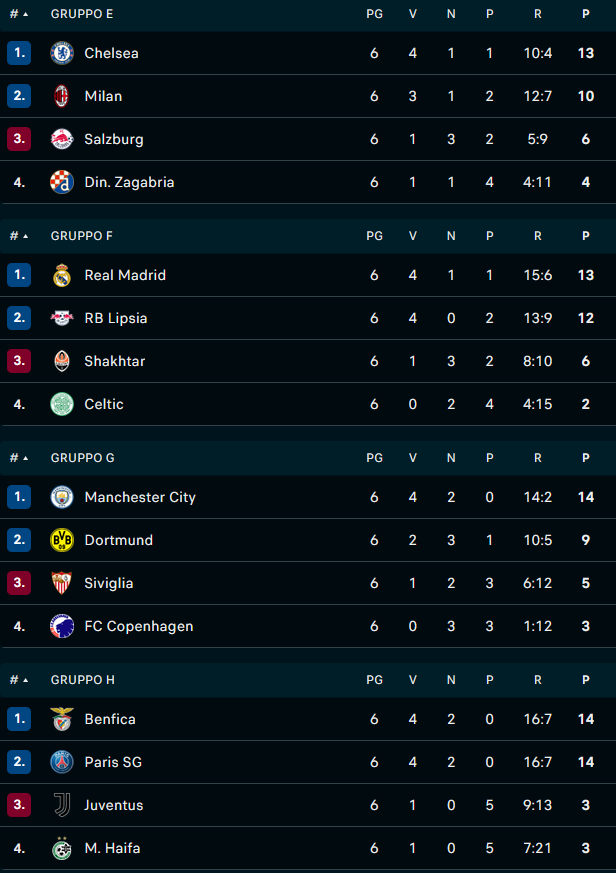

In [2]:
# not used
name_g = ['Napoli','Liverpool',
        'FC Porto','Club Brugge',
        'Bayern München','Inter',
        'Tottenham Hotspur','Eintracht Frankfurt',
        'Chelsea','AC Milan',
        'Real Madrid','RB Leipzig',
        'Manchester City','Borussia Dortmund',
        'Benfica','Paris Saint-Germain']

name = ['Napoli','FC Porto','Bayern München','Tottenham Hotspur','Chelsea','Real Madrid','Manchester City','Benfica',
        'Liverpool','Club Brugge','Inter','Eintracht Frankfurt','AC Milan','RB Leipzig','Borussia Dortmund','Paris Saint-Germain']

team = pd.DataFrame(name, columns=['Name'])

team['Code'] = np.arange(0,16)
team['Group'] = [0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7]

#0 England - #1 Spain - #2 Italy - #3 Germany - #4 France - #5 Portugal - #6 Belgium
team['Nation'] = [2,5,3,0,0,1,0,5,0,6,2,3,2,3,3,4]

In [3]:
# draw
df = pd.DataFrame(np.zeros((16,16)), columns = np.arange(0,16))
# number of tests
nt = 10000

for k in np.arange(0,nt):
    match = pd.DataFrame([],columns=['Club'])
    teams = team
    j=0
    while j != 8:
        # draw team 1
        a1 = teams.loc[np.random.randint(0,(8-j))]
        
        # now select the possible opponents to draw
        # possible nations
        n = teams['Nation'].value_counts()
        # if n teams of a nation are available of 2n teams then the match is already decided
        if max(n) == (2*len(teams)):
            if a1['Nation'] != n.idxmax():
                # if the random selected team is from that nation
                opponent = teams[teams['Nation'] == n.idxmax()]
                # the opponents are the others
            else:
                # otherwise the opposite
                opponent = teams[teams['Nation'] != n.idxmax()]
        else:
            # the possible opponents are the ones of the second round, different nation and different group
            opponent = teams[teams['Code'] > (7)]
            opponent = opponent[opponent['Nation'] != a1['Nation']]
            opponent = opponent[opponent['Group'] != a1['Group']].reset_index(drop=True)
        if len(opponent) == 0:
            j = 8
            # if there are not any more opponents exit from the cycle
        else:
            # draw team 2
            a2 = opponent.loc[np.random.randint(0,len(opponent))]
            b = [a1['Code'],a2['Code']]
            match[j] = b
            # remove from possible opponents the ones already extracted
            teams = teams[((teams['Code'] != a1['Code']) & (teams['Code'] != a2['Code']))]
            teams = teams.reset_index(drop=True)
            j = j+1
            # draw completed
            if len(teams) == 0:
                match = match.drop('Club',axis=1)
                for i in np.arange(0,16):
                    # top of the groups
                    if i<8:
                        s = match.loc[1][match.loc[0] == i]
                        df[i][s]=df[i][s]+1
                    # non-top of the groups
                    else:
                        s = match.loc[0][match.loc[1] == i]
                        df[i][s]=df[i][s]+1

pd.set_option('display.max_columns', 16)
tot = df[1].sum()
ucl_draw_ro16 = df/tot
print(ucl_draw_ro16)

          0         1         2         3         4         5         6   \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.204084  0.398094  0.000000  0.000000  0.202042  0.000000   
9   0.168958  0.000000  0.181892  0.143907  0.138598  0.112730  0.142274   
10  0.000000  0.144452  0.000000  0.174541  0.188700  0.144316  0.194282   
11  0.220286  0.141184  0.000000  0.000000  0.179306  0.140504  0.180123   
12  0.000000

In [8]:
name_columns = name
ucl_draw_ro16.columns = name_columns

In [9]:
ucl_draw_ro16_rounded = ucl_draw_ro16.round(2)
ucl_draw_ro16_rounded

Napoli  FC Porto  Bayern München  Tottenham Hotspur  Chelsea  Real Madrid  \
0     0.00      0.00            0.00               0.00     0.00         0.00   
1     0.00      0.00            0.00               0.00     0.00         0.00   
2     0.00      0.00            0.00               0.00     0.00         0.00   
3     0.00      0.00            0.00               0.00     0.00         0.00   
4     0.00      0.00            0.00               0.00     0.00         0.00   
5     0.00      0.00            0.00               0.00     0.00         0.00   
6     0.00      0.00            0.00               0.00     0.00         0.00   
7     0.00      0.00            0.00               0.00     0.00         0.00   
8     0.00      0.20            0.40               0.00     0.00         0.20   
9     0.17      0.00            0.18               0.14     0.14         0.11   
10    0.00      0.14            0.00               0.17     0.19         0.14   
11    0.22      0.14            0.00               0.00     0.18         0.14   
12    0.00      0.14            0.24               0.17     0.00         0.14   
13    0.22      0.13            0.00               0.18     0.18         0.00   
14    0.23      0.13            0.00               0.18     0.18         0.14   
15    0.16      0.11            0.18               0.15     0.14         0.12   

    Manchester City  Benfica  Liverpool  Club Brugge  Inter  \
0              0.00     0.00        0.0         0.17   0.00   
1              0.00     0.00        0.2         0.00   0.14   
2              0.00     0.00        0.4         0.18   0.00   
3              0.00     0.00        0.0         0.14   0.17   
4              0.00     0.00        0.0         0.14   0.19   
5              0.00     0.00        0.2         0.11   0.14   
6              0.00     0.00        0.0         0.14   0.19   
7              0.00     0.00        0.2         0.11   0.15   
8              0.00     0.20        0.0         0.00   0.00   
9              0.14     0.11        0.0         0.00   0.00   
10             0.19     0.15        0.0         0.00   0.00   
11             0.18     0.14        0.0         0.00   0.00   
12             0.17     0.14        0.0         0.00   0.00   
13             0.16     0.13        0.0         0.00   0.00   
14             0.00     0.13        0.0         0.00   0.00   
15             0.14     0.00        0.0         0.00   0.00   

    Eintracht Frankfurt  AC Milan  RB Leipzig  Borussia Dortmund  \
0                  0.22      0.00        0.22               0.23   
1                  0.14      0.14        0.13               0.13   
2                  0.00      0.24        0.00               0.00   
3                  0.00      0.17        0.18               0.18   
4                  0.18      0.00        0.18               0.18   
5                  0.14      0.14        0.00               0.14   
6                  0.18      0.17        0.16               0.00   
7                  0.14      0.14        0.13               0.13   
8                  0.00      0.00        0.00               0.00   
9                  0.00      0.00        0.00               0.00   
10                 0.00      0.00        0.00               0.00   
11                 0.00      0.00        0.00               0.00   
12                 0.00      0.00        0.00               0.00   
13                 0.00      0.00        0.00               0.00   
14                 0.00      0.00        0.00               0.00   
15                 0.00      0.00        0.00               0.00   

    Paris Saint-Germain  
0                  0.16  
1                  0.11  
2                  0.18  
3                  0.15  
4                  0.14  
5                  0.12  
6                  0.14  
7                  0.00  
8                  0.00  
9                  0.00  
10                 0.00  
11                 0.00  
12                 0.00  
13                 0.00  
14     

In [10]:
ucl_draw_ro16.to_csv('./ucl_2223-ro16draw-prediction.csv')

![Alt text](ucl_2223-ro16draw-prediction.png)

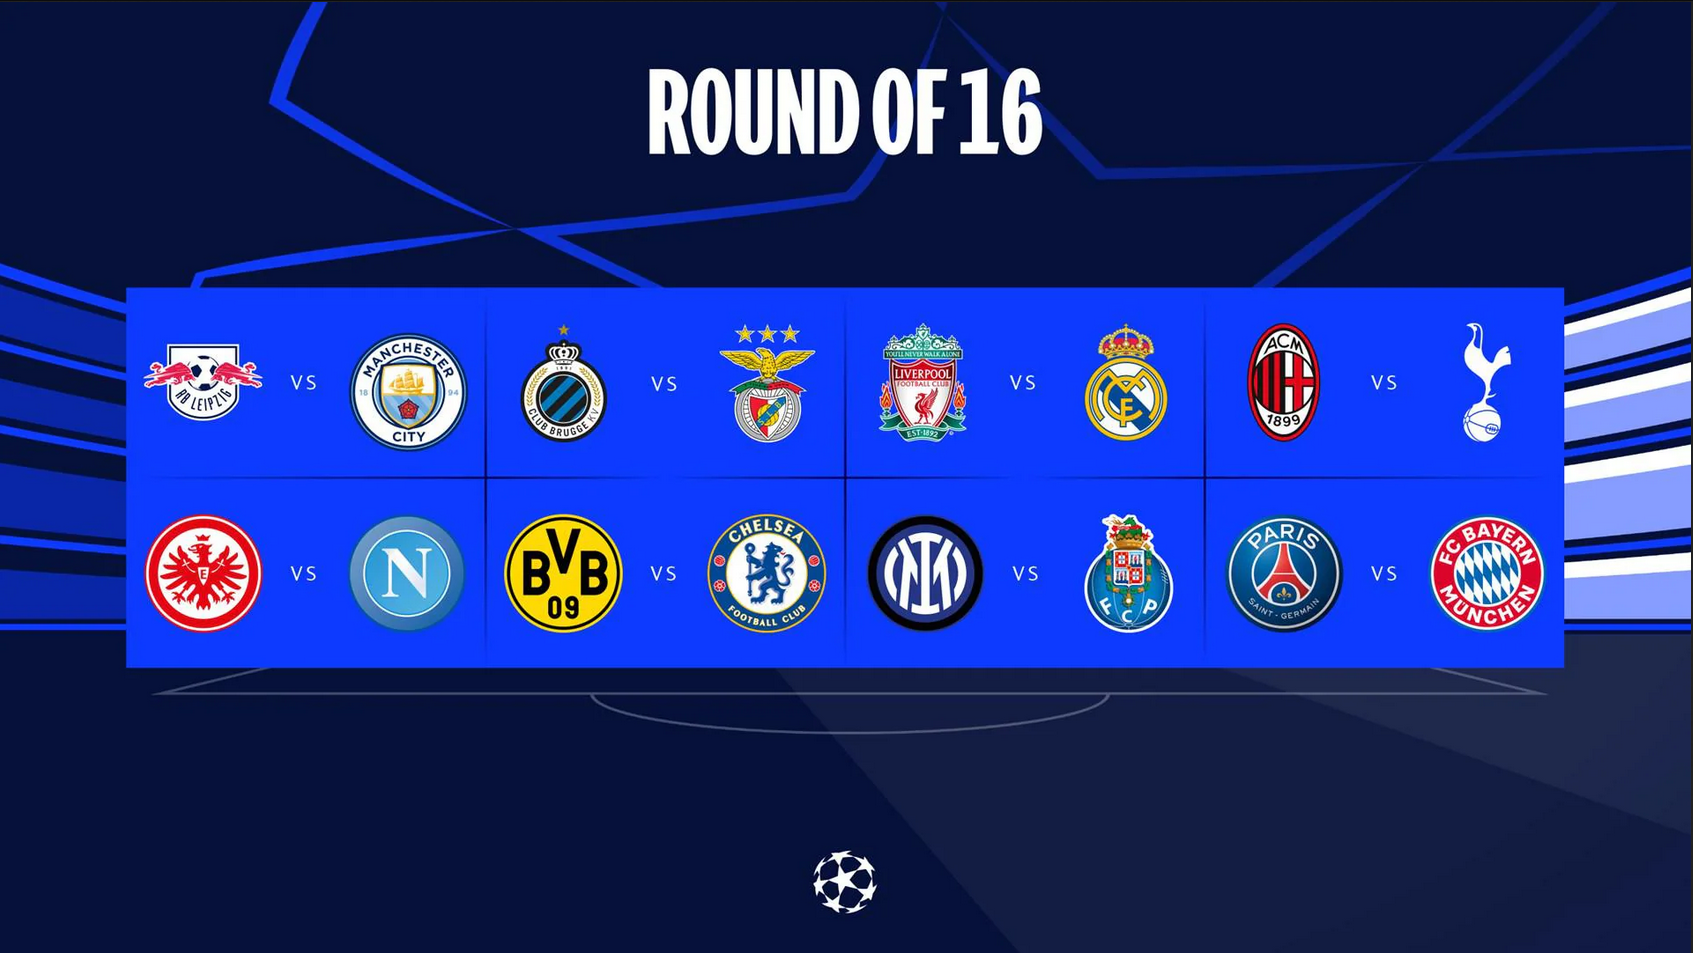